In [1]:
import pandas as pd
import numpy as np 
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/adrijamisra/Downloads/data.csv')

In [3]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


/Users/adrijamisra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

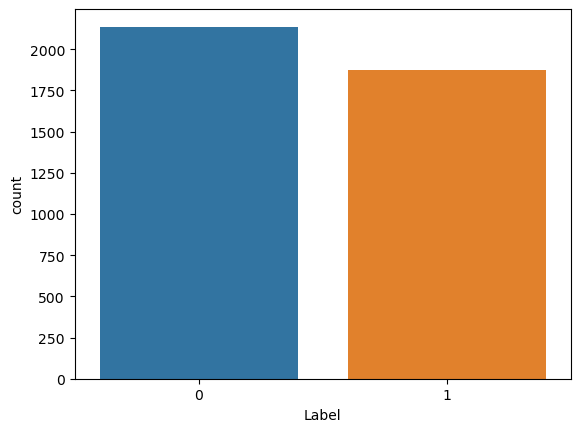

In [4]:
sns.countplot(df["Label"])

In [5]:
x = df.drop('Label', axis = 1)
x.head()

,URLs,Headline,Body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed..."
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin..."


In [6]:
y = df['Label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [7]:
df.shape

(4009, 4)

In [8]:
df = df.dropna()
df.shape

(3988, 4)

In [9]:
df.reset_index(inplace=True)

In [10]:
x['Articles'] = x['Headline']+x['Body']
x = x.drop(['URLs','Headline','Body'], axis = 1)

In [11]:
x.head()

,Articles
0,Four ways Bob Corker skewered Donald TrumpImag...
1,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
tfidfvect = TfidfVectorizer(stop_words='english',max_df=1,use_idf=True)
tfidf_x_train =tfidfvect.fit_transform(x_train)
tfidf_x_test = tfidfvect.transform(x_test)

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [16]:
classifier = PassiveAggressiveClassifier(max_iter = 50)

In [17]:
classifier.fit(tfidf_x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 3207]

In [ ]:
y_pred = classifier.predict(tfidf_x_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is: acc_score')

In [ ]:
confusion_matrix(y_test,y_pred, labels=['Fake news','True'])